In [2]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats

In [3]:
#reading files
data = pd.read_csv("training.csv", encoding='cp1252', sep=";")

In [4]:
#renaming columns
data.rename(columns = {'no. of in  cycle - SIGNOR':'no. of in cycle - SIGNOR', 
                        'no. of in  cycle - ReactomeFI':'no. of in cycle - ReactomeFI',
                        'no. of in  unbalanced triangle - SIGNOR':'no. of in unbalanced triangle - SIGNOR',
                        'no. of in  unbalanced triangle - ReactomeFI':'no. of in unbalanced triangle - ReactomeFI',
                        'in  triangle - SIGNOR':'in triangle - SIGNOR',
                        'in  triangle - ReactomeFI':'in triangle - ReactomeFI'}, 
             inplace = True)
print(list(data.head()))

['neighbour code', 'neighbour in CSN', 'neighbour in SIGNOR', 'neighbour in ReactomeFI', 'neighbour disorder content', 'neighbour preclinical target', 'neighbour MCG target', 'target code', 'target in CSN', 'target in SIGNOR', 'target in ReactomeFI', 'target of small molecule', 'target of antibody', 'targetneighbour', 'target disorder content', 'both in CSN', 'both in SIGNOR', 'both in ReactomeFI', 'both in all 3', 'in triangle - CSN', 'in triangle - SIGNOR', 'in triangle - ReactomeFI', 'not in any triangle', 'no. of triangles - CSN', 'no. of triangles - SIGNOR', 'no. of triangles - ReactomeFI', 'no. of in cycle - CSN', 'no. of in cycle - SIGNOR', 'no. of in cycle - ReactomeFI', 'no. of in unbalanced triangle - CSN', 'no. of in unbalanced triangle - SIGNOR', 'no. of in unbalanced triangle - ReactomeFI', 'neighbour – target inhibition - CSN', 'target – neighbour stimulation - CSN', 'neighbour – target stimulation - CSN', 'target – neighbour inhibition - CSN', 'neighbour – target inhibit

In [5]:
data

,neighbour code,neighbour in CSN,neighbour in SIGNOR,neighbour in ReactomeFI,neighbour disorder content,neighbour preclinical target,neighbour MCG target,target code,target in CSN,target in SIGNOR,...,target betweenness - SIGNOR,neighbour bridgeness - ReactomeFI,neighbour betweenness - ReactomeFI,target bridgeness - ReactomeFI,target betweenness - ReactomeFI,prognostic,predisposing,diagnostic,predictive,predictive biomarker for target?
0,23,1,1,1,0.0107,0,1,22,1,1,...,307930.868000,0.213382,391241.022700,1.719448,104769.64590,1,1,1,1,1
1,27,0,1,1,0.0581,0,0,22,1,1,...,307930.868000,0.220252,37360.077520,1.719448,104769.64590,1,1,1,1,1
2,178,1,1,1,0.1829,0,0,22,1,1,...,307930.868000,0.013259,74.942958,1.719448,104769.64590,1,1,1,1,1
3,72,1,1,1,0.1567,0,0,22,1,1,...,307930.868000,2.037940,542579.069500,1.719448,104769.64590,1,1,1,1,1
4,180,1,1,1,0.3948,0,0,62,1,1,...,51550.043170,0.054270,42141.153830,0.009968,121479.07530,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,203,1,1,1,0.0598,0,0,32,1,1,...,86734.951950,0.000277,717.425201,0.224211,84013.94301,1,0,0,0,0
105,204,1,1,1,0.1407,0,0,231,1,1,...,77403.499080,0.167315,40590.793620,0.016802,52490.07819,1,0,1,0,0
106,44,1,1,1,0.6334,0,0,5,0,1,...,4161.000000,0.012231,33599.562060,0.252387,12054.25912,1,1,1,1,0
107,152,0,0,1,0.2228,0,0,5,0,1,...,4161.000000,0.370094,17084.221820,0.252387,12054.25912,1,0,1,1,0


In [6]:
#titles list
titles = list(data.head())

print(titles)

['neighbour code', 'neighbour in CSN', 'neighbour in SIGNOR', 'neighbour in ReactomeFI', 'neighbour disorder content', 'neighbour preclinical target', 'neighbour MCG target', 'target code', 'target in CSN', 'target in SIGNOR', 'target in ReactomeFI', 'target of small molecule', 'target of antibody', 'targetneighbour', 'target disorder content', 'both in CSN', 'both in SIGNOR', 'both in ReactomeFI', 'both in all 3', 'in triangle - CSN', 'in triangle - SIGNOR', 'in triangle - ReactomeFI', 'not in any triangle', 'no. of triangles - CSN', 'no. of triangles - SIGNOR', 'no. of triangles - ReactomeFI', 'no. of in cycle - CSN', 'no. of in cycle - SIGNOR', 'no. of in cycle - ReactomeFI', 'no. of in unbalanced triangle - CSN', 'no. of in unbalanced triangle - SIGNOR', 'no. of in unbalanced triangle - ReactomeFI', 'neighbour – target inhibition - CSN', 'target – neighbour stimulation - CSN', 'neighbour – target stimulation - CSN', 'target – neighbour inhibition - CSN', 'neighbour – target inhibit

In [9]:
#what to correlate
no_of_triangles = [s for s in titles if "no. of triangles" in s]
no_of_cycles = [s for s in titles if "no. of in cycle" in s]
no_of_unbalanced = [s for s in titles if "no. of in unbalanced triangle" in s]
IDP_inh_target = [s for s in titles if "neighbour – target inhibition" in s]
target_stim_IDP = [s for s in titles if "target – neighbour stimulation" in s]
IDP_stim_target = [s for s in titles if "neighbour – target stimulation" in s]
target_inh_IDP = [s for s in titles if "target – neighbour inhibition" in s]
IDP_third = [s for s in titles if "neighbour third partner" in s]
target_third = [s for s in titles if "target third partner" in s]
IDP_bridgeness = [s for s in titles if "neighbour bridgeness" in s]
IDP_betweenness = [s for s in titles if "neighbour betweenness" in s]
target_bridgeness = [s for s in titles if "target bridgeness" in s]
target_betweenness = [s for s in titles if "target betweenness" in s]
#kinyomtatjuk
print(no_of_triangles)
print(no_of_cycles)
print(no_of_unbalanced)
print(IDP_inh_target)
print(target_stim_IDP)
print(IDP_stim_target)
print(target_inh_IDP)
print(IDP_third)
print(target_third)
print(IDP_bridgeness)
print(IDP_betweenness)
print(target_bridgeness)
print(target_betweenness)

['no. of triangles - CSN', 'no. of triangles - SIGNOR', 'no. of triangles - ReactomeFI']
['no. of in cycle - CSN', 'no. of in cycle - SIGNOR', 'no. of in cycle - ReactomeFI']
['no. of in unbalanced triangle - CSN', 'no. of in unbalanced triangle - SIGNOR', 'no. of in unbalanced triangle - ReactomeFI']
['neighbour – target inhibition - CSN', 'neighbour – target inhibition - SIGNOR', 'neighbour – target inhibition - ReactomeFI']
['target – neighbour stimulation - CSN', 'target – neighbour stimulation - SIGNOR', 'target – neighbour stimulation - ReactomeFI']
['neighbour – target stimulation - CSN', 'neighbour – target stimulation - SIGNOR', 'neighbour – target stimulation - ReactomeFI']
['target – neighbour inhibition - CSN', 'target – neighbour inhibition - SIGNOR', 'target – neighbour inhibition - ReactomeFI']
['neighbour third partner - CSN', 'neighbour third partner - SIGNOR', 'neighbour third partner - ReactomeFI']
['target third partner - CSN', 'target third partner - SIGNOR', 'targ

In [10]:
#linear regression function
def calculate_r2_score(data, title, nw1, nw2):
    title1 = [s for s in title if nw1 in s]
    title2 = [s for s in title if nw2 in s]
    data1 = data[title1]
    data2 = data[title2]
    model = LinearRegression()
    model.fit(data1, data2)
    r_squared = model.score(data1, data2)
    r2_dict = {f"{nw1} - {nw2}": r_squared}
    return r2_dict

In [11]:
#linear regression function without 0s
def calculate_r2_score_00(data, title, nw1, nw2):
    title1 = [s for s in title if nw1 in s]
    title2 = [s for s in title if nw2 in s]
    for index, row in data.iterrows():
        if row[f'both in {nw1}'] == 0:
            data.drop(index, inplace=True)
        elif row[f'both in {nw2}'] == 0:
            data.drop(index, inplace=True)
    print(data.shape)
    data1 = data[title1]
    data2 = data[title2]
    model = LinearRegression()
    model.fit(data1, data2)
    r_squared = model.score(data1, data2)
    r2_dict = {f"{nw1} - {nw2}": r_squared}
    return r2_dict

In [12]:
#common dict
def common_r2_dict(data, title):
    title_CSN_SIGNOR= calculate_r2_score(data=data, title=title, nw1="CSN", nw2="SIGNOR")
    title_SIGNOR_ReactomeFI= calculate_r2_score(data=data, title=title, nw1="SIGNOR", nw2="ReactomeFI")
    title_CSN_ReactomeFI= calculate_r2_score(data=data, title=title, nw1="CSN", nw2="ReactomeFI")
    title_dict = {**title_CSN_SIGNOR, **title_SIGNOR_ReactomeFI, **title_CSN_ReactomeFI}
    print(title)
    print(title_dict)
    return title_dict

In [13]:
#common dict without 0s
def common_r2_dict_00(data, title):
    title_CSN_SIGNOR= calculate_r2_score_00(data=data, title=title, nw1="CSN", nw2="SIGNOR")
    title_SIGNOR_ReactomeFI= calculate_r2_score_00(data=data, title=title, nw1="SIGNOR", nw2="ReactomeFI")
    title_CSN_ReactomeFI= calculate_r2_score_00(data=data, title=title, nw1="CSN", nw2="ReactomeFI")
    title_dict = {**title_CSN_SIGNOR, **title_SIGNOR_ReactomeFI, **title_CSN_ReactomeFI}
    print(title)
    print(title_dict)
    return title_dict

In [14]:
#running it for all categories
no_of_triangles_dict = common_r2_dict(data=data, title=no_of_triangles)
no_of_cycles_dict = common_r2_dict(data=data, title=no_of_cycles)
no_of_unbalanced_dict = common_r2_dict(data=data, title=no_of_unbalanced)
IDP_inh_target_dict = common_r2_dict(data=data, title=IDP_inh_target)
target_stim_IDP_dict = common_r2_dict(data=data, title=target_stim_IDP)
IDP_stim_target_dict = common_r2_dict(data=data, title=IDP_stim_target)
target_inh_IDP_dict = common_r2_dict(data=data, title=target_inh_IDP)
IDP_third_dict = common_r2_dict(data=data, title=IDP_third)
target_third_dict = common_r2_dict(data=data, title=target_third)
IDP_bridgeness_dict = common_r2_dict(data=data, title=IDP_bridgeness)
IDP_betweenness_dict = common_r2_dict(data=data, title=IDP_betweenness)
target_bridgeness_dict = common_r2_dict(data=data, title=target_bridgeness)
target_betweenness_dict = common_r2_dict(data=data, title=target_betweenness)

['no. of triangles - CSN', 'no. of triangles - SIGNOR', 'no. of triangles - ReactomeFI']
{'CSN - SIGNOR': 0.20751051444638624, 'SIGNOR - ReactomeFI': 0.26775297247760654, 'CSN - ReactomeFI': 0.058254553039942536}
['no. of in cycle - CSN', 'no. of in cycle - SIGNOR', 'no. of in cycle - ReactomeFI']
{'CSN - SIGNOR': 0.016534435464293562, 'SIGNOR - ReactomeFI': 0.1265853419185773, 'CSN - ReactomeFI': 0.008522518650328048}
['no. of in unbalanced triangle - CSN', 'no. of in unbalanced triangle - SIGNOR', 'no. of in unbalanced triangle - ReactomeFI']
{'CSN - SIGNOR': 0.008139563100111324, 'SIGNOR - ReactomeFI': 0.026573653468901504, 'CSN - ReactomeFI': 0.0010366618835706554}
['neighbour – target inhibition - CSN', 'neighbour – target inhibition - SIGNOR', 'neighbour – target inhibition - ReactomeFI']
{'CSN - SIGNOR': 0.2430555555555557, 'SIGNOR - ReactomeFI': 0.0014512471655330206, 'CSN - ReactomeFI': 0.00035273368606736355}
['target – neighbour stimulation - CSN', 'target – neighbour stimul

In [15]:
#running it for all categories, without 0s
no_of_triangles_dict_00 = common_r2_dict_00(data=data, title=no_of_triangles)
no_of_cycles_dict_00 = common_r2_dict_00(data=data, title=no_of_cycles)
no_of_unbalanced_dict_00 = common_r2_dict_00(data=data, title=no_of_unbalanced)
IDP_inh_target_dict_00 = common_r2_dict_00(data=data, title=IDP_inh_target)
target_stim_IDP_dict_00 = common_r2_dict_00(data=data, title=target_stim_IDP)
IDP_stim_target_dict_00 = common_r2_dict_00(data=data, title=IDP_stim_target)
target_inh_IDP_dict_00 = common_r2_dict_00(data=data, title=target_inh_IDP)
IDP_third_dict_00 = common_r2_dict_00(data=data, title=IDP_third)
target_third_dict_00 = common_r2_dict_00(data=data, title=target_third)
IDP_bridgeness_dict_00 = common_r2_dict_00(data=data, title=IDP_bridgeness)
IDP_betweenness_dict_00 = common_r2_dict_00(data=data, title=IDP_betweenness)
target_bridgeness_dict_00 = common_r2_dict_00(data=data, title=target_bridgeness)
target_betweenness_dict_00 = common_r2_dict_00(data=data, title=target_betweenness)

(52, 67)
(52, 67)
(52, 67)
['no. of triangles - CSN', 'no. of triangles - SIGNOR', 'no. of triangles - ReactomeFI']
{'CSN - SIGNOR': 0.176180842336918, 'SIGNOR - ReactomeFI': 0.3700550973023632, 'CSN - ReactomeFI': 0.06678802766330416}
(52, 67)
(52, 67)
(52, 67)
['no. of in cycle - CSN', 'no. of in cycle - SIGNOR', 'no. of in cycle - ReactomeFI']
{'CSN - SIGNOR': 0.007367223712340998, 'SIGNOR - ReactomeFI': 0.2068609931661688, 'CSN - ReactomeFI': 0.00938008156067116}
(52, 67)
(52, 67)
(52, 67)
['no. of in unbalanced triangle - CSN', 'no. of in unbalanced triangle - SIGNOR', 'no. of in unbalanced triangle - ReactomeFI']
{'CSN - SIGNOR': 0.003715890503349306, 'SIGNOR - ReactomeFI': 0.016999395812690388, 'CSN - ReactomeFI': 0.004580263153639796}
(52, 67)
(52, 67)
(52, 67)
['neighbour – target inhibition - CSN', 'neighbour – target inhibition - SIGNOR', 'neighbour – target inhibition - ReactomeFI']
{'CSN - SIGNOR': 0.4901960784313725, 'SIGNOR - ReactomeFI': 0.000784313725490704, 'CSN - Rea

In [16]:
#r2 dict merging
r2_dict = {'no. of triangles': no_of_triangles_dict, 
          'no. of in  cycle': no_of_cycles_dict, 
          'no. of in  unbalanced triangle': no_of_unbalanced_dict, 
          'IDP target inhibition': IDP_inh_target_dict, 
          'target IDP stimulation': target_stim_IDP_dict, 
          'IDP target stimulation': IDP_stim_target_dict, 
          'target IDP inhibition': target_inh_IDP_dict, 
          'IDP third partner': IDP_third_dict, 
          'target third partner': target_third_dict,
          'IDP bridgeness': IDP_bridgeness_dict, 
          'IDP betweenness': IDP_betweenness_dict, 
          'target bridgeness': target_bridgeness_dict, 
          'target betweenness': target_betweenness_dict,}
print(r2_dict)

{'no. of triangles': {'CSN - SIGNOR': 0.20751051444638624, 'SIGNOR - ReactomeFI': 0.26775297247760654, 'CSN - ReactomeFI': 0.058254553039942536}, 'no. of in  cycle': {'CSN - SIGNOR': 0.016534435464293562, 'SIGNOR - ReactomeFI': 0.1265853419185773, 'CSN - ReactomeFI': 0.008522518650328048}, 'no. of in  unbalanced triangle': {'CSN - SIGNOR': 0.008139563100111324, 'SIGNOR - ReactomeFI': 0.026573653468901504, 'CSN - ReactomeFI': 0.0010366618835706554}, 'IDP target inhibition': {'CSN - SIGNOR': 0.2430555555555557, 'SIGNOR - ReactomeFI': 0.0014512471655330206, 'CSN - ReactomeFI': 0.00035273368606736355}, 'target IDP stimulation': {'CSN - SIGNOR': 0.09344000226353166, 'SIGNOR - ReactomeFI': 0.002495905975102408, 'CSN - ReactomeFI': 0.0008037648344847437}, 'IDP target stimulation': {'CSN - SIGNOR': 0.2313123967535735, 'SIGNOR - ReactomeFI': 0.05258583224684943, 'CSN - ReactomeFI': 0.0002511513079811456}, 'target IDP inhibition': {'CSN - SIGNOR': 0.23131519274376455, 'SIGNOR - ReactomeFI': 0.00

In [17]:
#r2 dict merging without 0s
r2_dict_00 = {'no. of triangles': no_of_triangles_dict_00, 
          'no. of in  cycle': no_of_cycles_dict_00, 
          'no. of in  unbalanced triangle': no_of_unbalanced_dict_00, 
          'IDP target inhibition': IDP_inh_target_dict_00, 
          'target IDP stimulation': target_stim_IDP_dict_00, 
          'IDP target stimulation': IDP_stim_target_dict_00, 
          'target IDP inhibition': target_inh_IDP_dict_00, 
          'IDP third partner': IDP_third_dict_00, 
          'target third partner': target_third_dict_00,
          'IDP bridgeness': IDP_bridgeness_dict_00, 
          'IDP betweenness': IDP_betweenness_dict_00, 
          'target bridgeness': target_bridgeness_dict_00, 
          'target betweenness': target_betweenness_dict_00,}
print(r2_dict_00)

{'no. of triangles': {'CSN - SIGNOR': 0.176180842336918, 'SIGNOR - ReactomeFI': 0.3700550973023632, 'CSN - ReactomeFI': 0.06678802766330416}, 'no. of in  cycle': {'CSN - SIGNOR': 0.007367223712340998, 'SIGNOR - ReactomeFI': 0.2068609931661688, 'CSN - ReactomeFI': 0.00938008156067116}, 'no. of in  unbalanced triangle': {'CSN - SIGNOR': 0.003715890503349306, 'SIGNOR - ReactomeFI': 0.016999395812690388, 'CSN - ReactomeFI': 0.004580263153639796}, 'IDP target inhibition': {'CSN - SIGNOR': 0.4901960784313725, 'SIGNOR - ReactomeFI': 0.000784313725490704, 'CSN - ReactomeFI': 0.0003844675124952124}, 'target IDP stimulation': {'CSN - SIGNOR': 0.07094868955334055, 'SIGNOR - ReactomeFI': 0.007751937984496027, 'CSN - ReactomeFI': 0.026455026455026398}, 'IDP target stimulation': {'CSN - SIGNOR': 0.3183544563389522, 'SIGNOR - ReactomeFI': 0.05088090204369278, 'CSN - ReactomeFI': 1.924001924014096e-05}, 'target IDP inhibition': {'CSN - SIGNOR': 0.2100694444444442, 'SIGNOR - ReactomeFI': 0.010869565217

<AxesSubplot:title={'center':'Linear regression R2 values among networks'}>

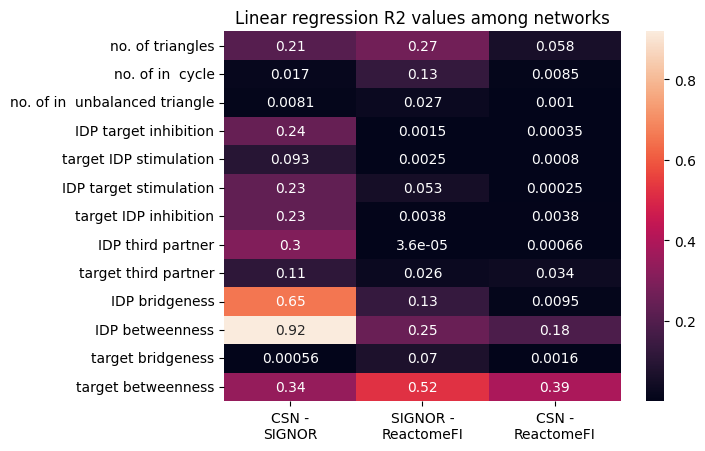

In [18]:
#heatmap
r2 = pd.DataFrame(r2_dict)
r2 = r2.transpose()
r2 = r2.set_axis(["CSN -\nSIGNOR", "SIGNOR -\nReactomeFI", "CSN -\nReactomeFI"], axis=1)
plt.title(label="Linear regression R2 values among networks")
sns.heatmap(r2, annot=True)

<AxesSubplot:title={'center':'Linear regression R2 values among networks -\ndropped if not in both network'}>

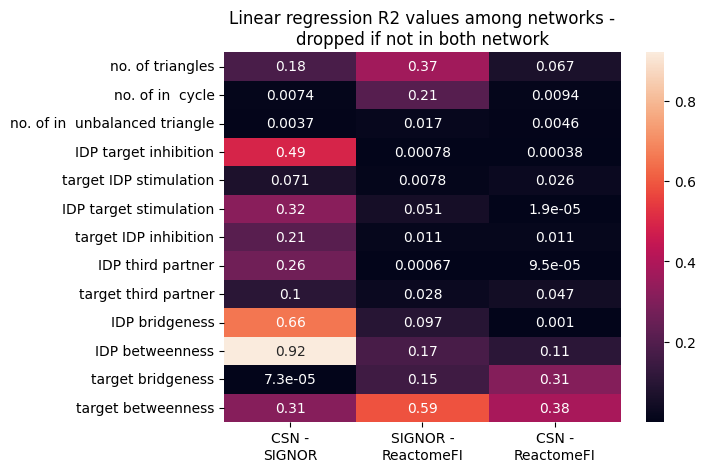

In [19]:
#heatmap without 0s
r2_00 = pd.DataFrame(r2_dict_00)
r2_00 = r2_00.transpose()
r2_00 = r2_00.set_axis(["CSN -\nSIGNOR", "SIGNOR -\nReactomeFI", "CSN -\nReactomeFI"], axis=1)
plt.title(label="Linear regression R2 values among networks -\ndropped if not in both network")
sns.heatmap(r2_00, annot=True)

In [20]:
#correlation visualising
x = data["IDP bridgeness - ReactomeFI"]
y = data["IDP bridgeness - SIGNOR"]
sns.regplot(x, y)

KeyError: 'IDP bridgeness - ReactomeFI'